## Performance for the proposed algorithm
In the following code, I have implemented the (1+1) Opt-IA with Symmetric MexpoHD in which onemax and twomax algorithm has been used to check that it has the desired properties before working further onto its usage in Maxsat problems.

In [1]:
import numpy as np
import import_ipynb
import onemax
import twomax
import time
import queue
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import sys
from random import choice

importing Jupyter notebook from onemax.ipynb
importing Jupyter notebook from twomax.ipynb


In [2]:
#uniformly distributed initialisation
#n = size of the candidate
def unif_initialization(n):
    bit_list = np.random.randint(2, size = n)
    candidate_solution = ''.join(str(bit) for bit in bit_list)
    return candidate_solution

def unif_mutation(candidate, benchmark_func, run_time, mutation_potential = 0):
    
    #Will be used to check if there is constructive mutation or the number of bit mutation has reached mutation potential
    bit_change_condition = True
    
    #candidate used to check for constructive mutation
    set_candidate = candidate
    
    #To add the flipped bits
    flipped_bit = np.array([])
    while bit_change_condition == True:
        
        #Select bit to flip
        bit_change = choice([i for i in range(0,len(candidate)) if i not in flipped_bit])
        flipped_bit = np.append(flipped_bit, bit_change)
        
        #Create new candidate to be used
        new_candidate = set_candidate[:bit_change]
        if set_candidate[bit_change] == "0":
            new_candidate += "1"
        else:
            new_candidate += "0"
        new_candidate += set_candidate[bit_change + 1:]
        set_candidate = new_candidate
        
        #Compare results
        if fitness_calculation(new_candidate, benchmark_func) > fitness_calculation(candidate, benchmark_func):
            bit_change_condition = False
        if (hamming_distance(new_candidate, candidate) >= mutation_potential):
            bit_change_condition = False
        #Add run-time after checking fitness
        run_time += 1
    return new_candidate, run_time

In [3]:
#hamming distance calculation
def hamming_distance(candidate1, candidate2):
    i = 0
    hd = 0
    for char1 in list(candidate1):
        if (char1 != candidate2[i]):
            hd += 1
        i += 1
    return hd

In [4]:
#mutation potential
def symmetric_MexpoHD(n, x, x_origin, best):
    power_numerator = hamming_distance(x, x_origin)
    power_denominator = np.maximum(hamming_distance(best, x_origin), 1)
    power_value = -(power_numerator/power_denominator)
    m1 = np.power(n, power_value)
    m = int(np.ceil(n*m1))
    return m

In [5]:
def decide_eliminate_candidate(probabilty_to_eliminate):
    p_die = np.random.random_sample()
    result = False
    if p_die > probabilty_to_eliminate:
        result = True
    return result

In [6]:
def fitness(x, i):
    if i == 0: #for onemax
        return onemax.fitness(x)
    if i == 1: #for twomax
        return twomax.fitness(x)

def fitness_calculation(x, i):
    if i == 0: #for onemax
        return onemax.fitness_calculation(x)
    if i == 1:
        return twomax.fitness_calculation(x)

In [7]:
# The benchmark func has the following meaning. 0 is for onemax and 1 for twomax.
# This can also be updated in the fitness and fitness_calculation method to add on more benchmark functions.
def immune_algorithm(n, C, benchmark_func):
    
    age_threshold = n * np.log(n) * C
    #initialize x
    intialized_candidate = unif_initialization(n)
    x = (intialized_candidate, intialized_candidate, 0); best = x[0]
    y = (intialized_candidate, intialized_candidate, 0)
    # tuple order = (x, origin, age)
    
    #Evaluate f(x)
    termination_condition = fitness(best, benchmark_func)
    #Set run time
    run_time = 1
    while (termination_condition == False):
        
        #add age
        x_age = x[2] + 1
        x = (x[0], x[1], x_age)
        
        #mutate x to y and set origin for y
        M = symmetric_MexpoHD(n, x[0], x[1], best)
        mutation_x, run_time = unif_mutation(x[0], benchmark_func, run_time, mutation_potential = M)
        
        #Set y.origin = x.origin
        y = (mutation_x, x[1], y[2])
        
        #check fitness between y and x
        if (fitness_calculation(y[0], benchmark_func) > fitness_calculation(x[0], benchmark_func)):
            #set y.age = 0
            y = (y[0], y[1], 0)
            #Check best solution
            if (fitness_calculation(y[0], benchmark_func) >= fitness_calculation(best, benchmark_func)):
                #Set best solution
                best = y[0]
                termination_condition = fitness(best, benchmark_func)
        else:
            #add y age
            y = (y[0], y[1], x[2])
        
        #aging mechanism for x and y
        collection_candidates = [x,y]
        for candidate in collection_candidates:
            #check for age threshold and probability to die set at 0.5
            if ((candidate[2] > age_threshold) and (decide_eliminate_candidate(0.5) == True)):
                #reset the candidate and their age
                reset_candidate = unif_initialization(n) #reinitialize
                x = (reset_candidate, x[0], 0) 
                y = (reset_candidate, y[0], 0)
                
        # best solution selection
        if (fitness_calculation(x[0], benchmark_func) < fitness_calculation(y[0], benchmark_func)):
            x = (y[0], x[1], x[2])
    return run_time
            

### Table for Opt-IA is applied in Onemax function
The following method has been made to depict the graph for proposed Opt-IA algorithm being applied in the onemax function. The method will test from 5 to 25 bits in which each bit will be repeated 20 times to test for the average time taken.

In [8]:
def worker(queue):
    print("Hi")
    run_time += immune_algorithm(task[0], task[1], task[2])
    return run_time

def divide_task(set_args, run_time):
    """
    #Creating processes
    for w in range(number_of_processes):
        p = Process(target=worker, args = (queue,))
        processes.append(p)
        p.start()

    for process in processes:
        p.join()
    """ 
    run_time
    repeat = set_args[3]
    number_of_processes = 5
    processes = []
    task = ([set_args[0], set_args[1], set_args[2]])
    print(task)
    
    p = Process(target=worker, args=(task,))
    p.start()
    p.join()
    return run_time

Currently working on 25th bit out of 25 bits                                          

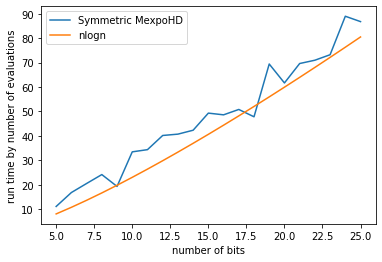

In [9]:
#starts from 5 bits until the max_bit
#repeat is the number of time repeated and the average time taken from it will be used
def plot_graph_onemax(max_bit, repeat):
    y_axis = np.array([])
    control_y = np.array([])
    sys.stdout.write('The process will go through ' + str(max_bit) + ' bits')
    sys.stdout.flush()
    for n in range(5,max_bit+6):
        control_value = np.log(n) * n
        control_y = np.append(control_y, control_value)
        run_time = 0
        for i in range(repeat):
            run_time += immune_algorithm(n, 15, 0)
        run_time = run_time/repeat
        y_axis = np.append(y_axis, run_time)
        #To check progress
        sys.stdout.write(f"\r{' '*100}\r")
        sys.stdout.flush()
        sys.stdout.write('Currently working on ' + '\x1b[7;37;42m' + str(n) + 'th' + '\x1b[0m' + ' bit out of ' + str(max_bit + 5) + ' bits')
        sys.stdout.flush()
    x_axis = np.arange(5,max_bit+6)
    plt.xlabel("number of bits")
    plt.ylabel("run time by number of evaluations")
    plt.plot(x_axis,y_axis, label = "Symmetric MexpoHD")
    plt.plot(x_axis,control_y, label = "nlogn")
    plt.legend()
    
plot_graph_onemax(20, 20)

In [10]:
"""
#test for hamming distance calculation
def test_HD():
    test_candidate0 = "0000000000000000"
    test_candidate1 = "1000010101010101"
    test_candidate2 = "0101010100000010"
    assert hamming_distance(test_candidate0, test_candidate1) == 7, "Should be 7"
    assert hamming_distance(test_candidate1, test_candidate2) == 8; "Should be 8"
    assert hamming_distance(test_candidate1, test_candidate1) == 0; "Should be 0" 

#test for mutation with the desired mutation potential
#16 bit candidate is used in which the mutation potential ranges from 1 to 16
def test_mutation():
    for i in range(16):
        for j in range(10):
            current_candidate = unif_initialization(16)
            new_candidate = unif_mutation(current_candidate, 0, 0, i)
            assert hamming_distance(current_candidate, new_candidate) <= i; "Problems with getting the desired mutation potential"

if __name__ == "__main__":
    test_HD()
    test_mutation()
    print("Everything passed")
"""

'\n#test for hamming distance calculation\ndef test_HD():\n    test_candidate0 = "0000000000000000"\n    test_candidate1 = "1000010101010101"\n    test_candidate2 = "0101010100000010"\n    assert hamming_distance(test_candidate0, test_candidate1) == 7, "Should be 7"\n    assert hamming_distance(test_candidate1, test_candidate2) == 8; "Should be 8"\n    assert hamming_distance(test_candidate1, test_candidate1) == 0; "Should be 0" \n\n#test for mutation with the desired mutation potential\n#16 bit candidate is used in which the mutation potential ranges from 1 to 16\ndef test_mutation():\n    for i in range(16):\n        for j in range(10):\n            current_candidate = unif_initialization(16)\n            new_candidate = unif_mutation(current_candidate, 0, 0, i)\n            assert hamming_distance(current_candidate, new_candidate) <= i; "Problems with getting the desired mutation potential"\n\nif __name__ == "__main__":\n    test_HD()\n    test_mutation()\n    print("Everything pass